In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

In [129]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, SelectPercentile, VarianceThreshold, chi2, f_classif, mutual_info_classif, f_regression, mutual_info_regression

In [34]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [35]:
df = pd.DataFrame(data)

In [37]:
def one_dummies(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    df = df.drop(each,axis=1)
    return df

In [38]:
columns = []
columns.append('neighborhood')

In [39]:
df2 = one_dummies(df,columns)
print(df2)

    price  rooms  neighborhood_Fremont  neighborhood_Queen Anne  \
0  850000      4                     0                        1   
1  700000      3                     1                        0   
2  650000      3                     0                        0   
3  600000      2                     1                        0   

   neighborhood_Wallingford  
0                         0  
1                         0  
2                         1  
3                         0  


In [124]:
df3 = df.copy()
label_encoder = LabelEncoder()
df3['neighborhood'] = label_encoder.fit_transform(df['neighborhood'])
print(df3)
print(df)


   neighborhood   price  rooms
0             1  850000      4
1             0  700000      3
2             2  650000      3
3             0  600000      2
  neighborhood   price  rooms
0   Queen Anne  850000      4
1      Fremont  700000      3
2  Wallingford  650000      3
3      Fremont  600000      2


In [171]:
df["neighborhood"].value_counts()

Fremont        2
Queen Anne     1
Wallingford    1
Name: neighborhood, dtype: int64

In [172]:
df3["neighborhood"].value_counts()

0    2
2    1
1    1
Name: neighborhood, dtype: int64

# Text Features 

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [81]:
stop_list = ['the']

vec = CountVectorizer(stop_words=stop_list,lowercase=True) #Convert a collection of text documents to a matrix of token counts

X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [82]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


### If it's a df 

In [132]:
sample = pd.DataFrame(sample)
sample

,0
0,problem of evil
1,evil queen
2,horizon problem


In [142]:
stop_list = ['the']

vec = CountVectorizer(stop_words=stop_list,lowercase=True) #Convert a collection of text documents to a matrix of token counts


X = vec.fit_transform(sample.iloc[:,0])
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [143]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


# Imputation of Missing Data

In [88]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [130]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean', axis=0) #axis 0 = coluna, 1=linha / 'mean','median','most_frequent'
X2 = imp.fit_transform(X)
print(imp.statistics_)
print('\n',X2)

[4.5 5.  4.2]

 [[4.5 0.  3. ]
 [3.  7.  9. ]
 [3.  5.  2. ]
 [4.  5.  6. ]
 [8.  8.  1. ]]


In [ ]:
print("# Missing = %d" % data.isnull().sum().sum())
#Backward fill
data.fillna(method='bfill', inplace=True)
    
# Forward fill
data.fillna(method='ffill', inplace=True)

# Standardization 

#### Typically, to standardize variables, you calculate the mean and standard deviation for a variable. Then, for each observed value of the variable, you subtract the mean and divide by the standard deviation.

In [163]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                     [ 0.,  1., -1.]])

scaler = preprocessing.StandardScaler().fit(X_train)
scaler.transform(X_train) 

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [164]:
print(scaler.mean_)
print(scaler.var_)
print(scaler.n_samples_seen_)

[1.         0.         0.33333333]
[0.66666667 0.66666667 1.55555556]
3


## MinMax Scaler (Scale to range [0,1])

In [165]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax


array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

## Robust Scaler 

In [166]:
transformer = preprocessing.RobustScaler().fit(X_train)
X_train_robust = transformer.fit_transform(X_train)
X_train_robust

array([[ 0.        , -1.        ,  1.33333333],
       [ 1.        ,  0.        ,  0.        ],
       [-1.        ,  1.        , -0.66666667]])

##  Normalizer

In [169]:
normalizer = preprocessing.Normalizer(norm='l2').fit(X_train) 
X_normalized = normalizer.transform(X_train)
X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

# Discretizing

In [173]:
df.head()

,neighborhood,price,rooms
0,Queen Anne,850000,4
1,Fremont,700000,3
2,Wallingford,650000,3
3,Fremont,600000,2


In [200]:
custom_bucket_array = np.linspace(60000, 90000, 5)
custom_bucket_array

array([60000., 67500., 75000., 82500., 90000.])

In [201]:
data = [
    {'price': 85000.5, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 70000.4, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 65000.2, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 60000.6, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [202]:
df4 = pd.DataFrame(data)

In [203]:
print(df4)
pd.cut(df4['price'], custom_bucket_array)

  neighborhood    price  rooms
0   Queen Anne  85000.5      4
1      Fremont  70000.4      3
2  Wallingford  65000.2      3
3      Fremont  60000.6      2


0    (82500.0, 90000.0]
1    (67500.0, 75000.0]
2    (60000.0, 67500.0]
3    (60000.0, 67500.0]
Name: price, dtype: category
Categories (4, interval[float64]): [(60000.0, 67500.0] < (67500.0, 75000.0] < (75000.0, 82500.0] < (82500.0, 90000.0]]

In [3]:
numeros = pd.read_csv("classificacao_Q4.csv")
numeros.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,target
0,1.696199,-0.792598,-0.349427,-0.464560,3.187014,0.035976,1.033274,-1.504968,0.204693,1.691204,...,1.488142,-0.686337,2.084970,-0.685140,-2.049451,2.015426,1.158477,-0.309441,-1.549833,4.0
1,-0.236696,-2.202342,0.024023,1.497700,-0.069758,-2.467088,1.126529,-0.570557,2.079251,-1.882632,...,0.405567,0.509564,1.374071,-0.016943,-0.429280,-0.895016,1.259566,-0.354139,0.806797,5.0
2,-0.436683,1.563816,-0.895999,-0.580425,0.311060,-0.187369,0.805249,-2.399522,-0.578818,1.586981,...,0.933578,-1.285978,0.503162,0.204829,-0.753835,0.290033,1.721487,1.304518,0.478903,3.0
3,1.425908,0.400055,-0.305038,-0.930251,-2.214549,1.763379,-0.239868,-2.058891,-1.006533,-2.156839,...,-0.849927,1.402768,0.393653,-1.466818,0.152257,-4.004950,0.676342,-1.927319,1.959032,8.0
4,-0.186156,-0.975764,0.594660,-1.181980,-1.443414,-0.797651,-1.252608,-0.060452,0.130702,-2.343517,...,-1.444435,-1.818126,0.446574,0.239328,0.802939,-2.035289,-1.433793,-0.218596,0.619317,9.0


In [22]:
pca = PCA(n_components=2, random_state=None)
pca.fit(numeros)
numeros2 = pca.transform(numeros)

#### The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [23]:
print(pca.components_)
print(pca.explained_variance_)


[[-1.40074653e-03 -3.64053021e-02  1.06552541e-03  1.80758243e-03
  -2.17635824e-01 -7.03538354e-03  2.81603179e-03 -3.20702363e-03
  -2.44200060e-03 -1.20478783e-01 -4.06200123e-03  3.94363016e-01
  -2.87516691e-03 -1.65309417e-03 -1.45255173e-03 -8.64208673e-02
  -2.24157249e-03 -8.51588171e-04  3.18101533e-03  8.47784480e-04
  -1.28565772e-01  1.25061445e-03 -1.89330959e-03 -2.97076500e-02
  -2.51000394e-03  1.64831839e-03  1.10747035e-05  4.91774634e-03
  -3.41573856e-03 -4.13213088e-04  1.22954192e-01  3.91738578e-03
   8.36786632e-02  3.32132884e-01 -3.39555369e-03  1.44809893e-02
   6.21106004e-03 -5.07543910e-03  1.67076006e-03  3.13195999e-03
  -1.87057351e-03 -2.46604966e-02 -6.96507810e-03  3.07696153e-01
   1.59636298e-01 -1.94863405e-03  2.13249425e-03  3.98952679e-03
  -1.18673505e-03  2.08374205e-04  2.37753377e-01  5.08949016e-02
  -9.82788091e-04 -2.53047077e-01 -2.60371996e-01  3.39853866e-03
   4.39227180e-03  1.74368068e-01 -1.48238970e-03  9.74569689e-02
  -1.80899

In [25]:
print("original shape:   ", numeros.shape)
print("transformed shape:", numeros2.shape)

original shape:    (1500, 101)
transformed shape: (1500, 2)


In [30]:
pca2.explained_variance_ratio_

array([0.24547893, 0.18839227, 0.09938445, 0.06372693, 0.04747241,
       0.0332237 , 0.00717149, 0.00687872, 0.00674434, 0.00668826,
       0.00661004, 0.00653513, 0.00631621, 0.00623368, 0.00611364,
       0.00607886, 0.006027  , 0.00597475, 0.00596879, 0.00594349,
       0.00585267, 0.00582761, 0.00561815, 0.00553359, 0.00549741,
       0.00547887, 0.00545054, 0.00540761, 0.00533922, 0.00523736,
       0.00519378, 0.00512546, 0.00511797, 0.00508394, 0.00499459,
       0.00490852, 0.00483146, 0.00478843, 0.00477302, 0.00470443,
       0.00463723, 0.00461976, 0.00456091, 0.00453927])

Text(0,0.5,'cumulative explained variance')

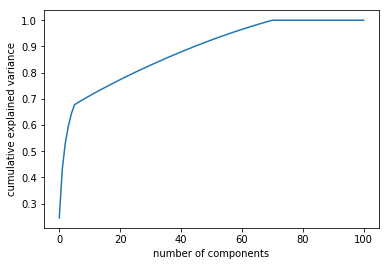

In [32]:
pca2 = PCA().fit(numeros)
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [119]:
numeros_x = pd.DataFrame()
numeros_y = pd.DataFrame()
numeros_x = numeros.iloc[:,:-1]
print(numeros_x.head())
print(numeros_x.shape)


numeros_y = numeros.iloc[:,-1:]
print(numeros_y.head())
print(numeros_y.shape)

         x0        x1        x2        x3        x4        x5        x6  \
0  1.696199 -0.792598 -0.349427 -0.464560  3.187014  0.035976  1.033274   
1 -0.236696 -2.202342  0.024023  1.497700 -0.069758 -2.467088  1.126529   
2 -0.436683  1.563816 -0.895999 -0.580425  0.311060 -0.187369  0.805249   
3  1.425908  0.400055 -0.305038 -0.930251 -2.214549  1.763379 -0.239868   
4 -0.186156 -0.975764  0.594660 -1.181980 -1.443414 -0.797651 -1.252608   

         x7        x8        x9    ...          x90       x91       x92  \
0 -1.504968  0.204693  1.691204    ...    -0.534360  1.488142 -0.686337   
1 -0.570557  2.079251 -1.882632    ...     0.498207  0.405567  0.509564   
2 -2.399522 -0.578818  1.586981    ...    -2.630024  0.933578 -1.285978   
3 -2.058891 -1.006533 -2.156839    ...    -0.260665 -0.849927  1.402768   
4 -0.060452  0.130702 -2.343517    ...     1.098563 -1.444435 -1.818126   

        x93       x94       x95       x96       x97       x98       x99  
0  2.084970 -0.685140 -2

## Feature Selection

In [127]:
# Create and fit selector
selector = SelectKBest(mutual_info_classif, k=40)
selector.fit(numeros_x, numeros_y)
# Get idxs of columns to keep
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)
# Create new dataframe with only desired columns, or overwrite existing
df_data = numeros_x.iloc[:,idxs_selected]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 1  4  7  9 11 15 17 20 23 30 32 33 35 41 43 44 50 51 53 54 57 59 68 69
 70 73 74 77 79 81 82 84 85 87 90 92 95 96 97 99]


In [137]:
varSelector = VarianceThreshold(threshold=1.05)
varSelector.fit(numeros_x,numeros_y)
idxs_selected = varSelector.get_support(indices=True)
print(idxs_selected)
# Create new dataframe with only desired columns, or overwrite existing
df_data2 = numeros_x.iloc[:,idxs_selected]

[ 1  4  7  8  9 11 15 20 23 30 32 33 35 43 44 46 50 51 53 54 57 59 69 70
 73 74 77 79 82 84 87 90 92 93 95 96 97 99]


In [128]:
df_data.head()

,x1,x4,x7,x9,x11,x15,x17,x20,x23,x30,...,x82,x84,x85,x87,x90,x92,x95,x96,x97,x99
0,-0.792598,3.187014,-1.504968,1.691204,-4.074097,-0.237805,-1.570864,0.549905,1.128273,-2.626552,...,0.176175,1.058247,0.503351,0.221213,-0.534360,-0.686337,-2.049451,2.015426,1.158477,-1.549833
1,-2.202342,-0.069758,-0.570557,-1.882632,1.005103,-1.288871,1.227582,0.588903,1.022461,0.663234,...,1.652978,-2.274763,-1.451749,1.292452,0.498207,0.509564,-0.429280,-0.895016,1.259566,0.806797
2,1.563816,0.311060,-2.399522,1.586981,-0.596377,0.902347,-0.780838,-0.583627,-1.450107,-0.799201,...,-0.620487,1.390414,0.449638,-0.512526,-2.630024,-1.285978,-0.753835,0.290033,1.721487,0.478903
3,0.400055,-2.214549,-2.058891,-2.156839,3.135035,-0.831289,-1.479070,-0.441100,-2.030159,3.549965,...,0.217302,-0.604043,-1.798876,1.441341,-0.260665,1.402768,0.152257,-4.004950,0.676342,1.959032
4,-0.975764,-1.443414,-0.060452,-2.343517,-0.533092,3.732211,2.046445,4.716702,1.917857,0.179220,...,-1.981894,-2.788302,-0.067919,-1.878879,1.098563,-1.818126,0.802939,-2.035289,-1.433793,0.619317


In [76]:
data_wine = pd.read_csv('data_files/wine.csv')
data_wine_x = data_wine.iloc[:,:-1]
data_wine_y = data_wine.iloc[:,-1:]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


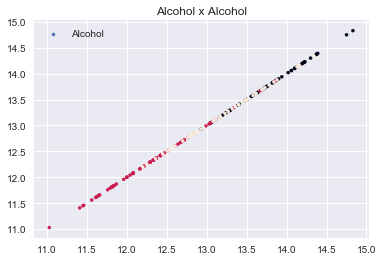

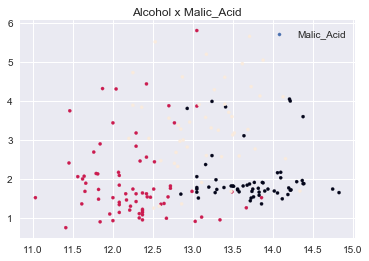

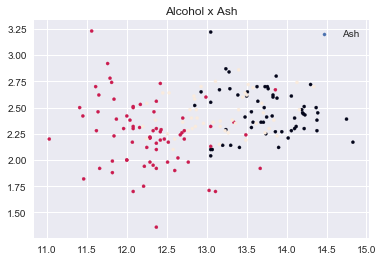

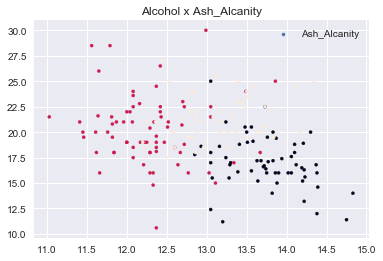

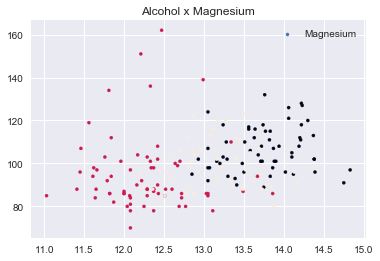

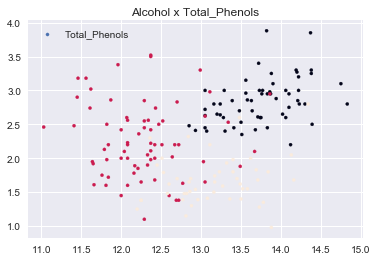

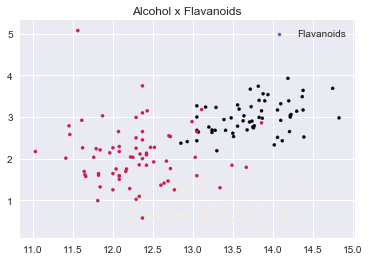

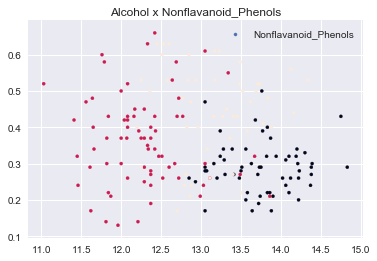

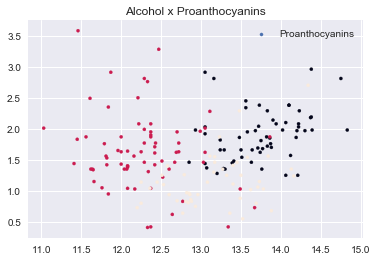

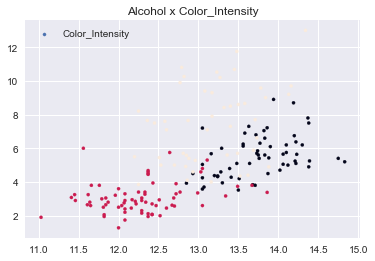

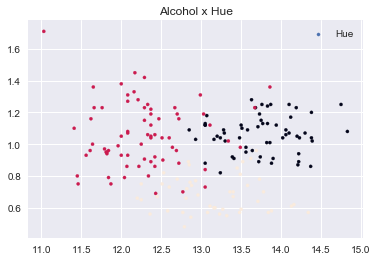

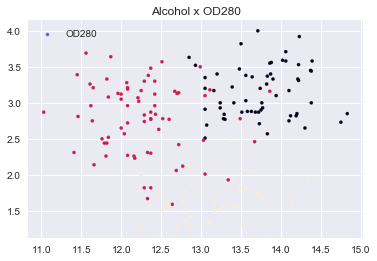

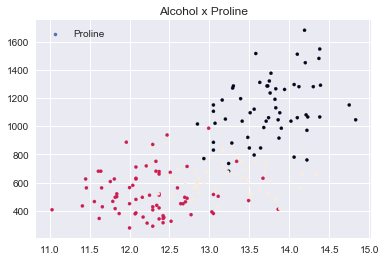

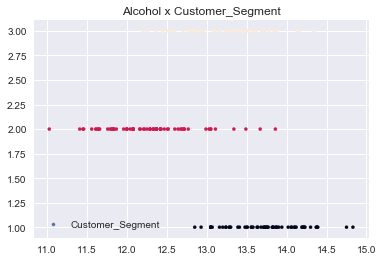

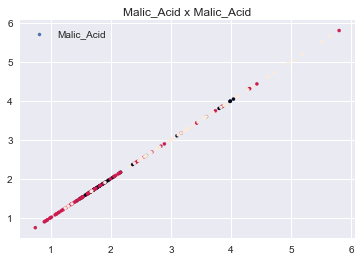

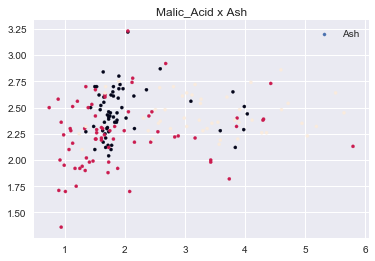

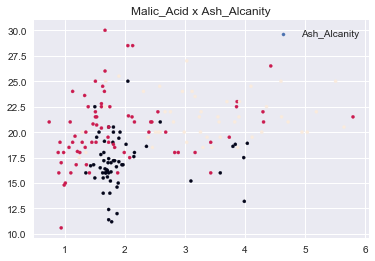

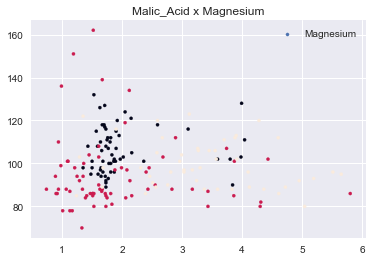

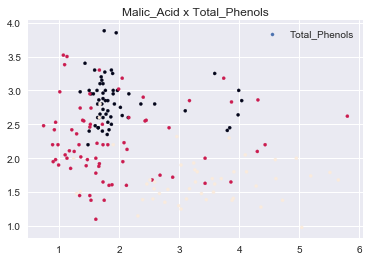

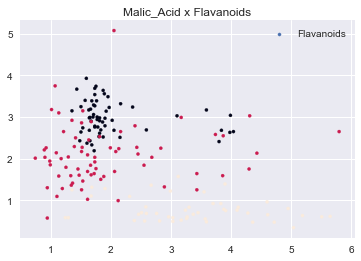

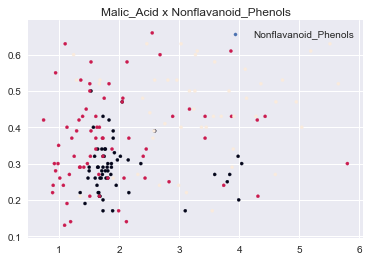

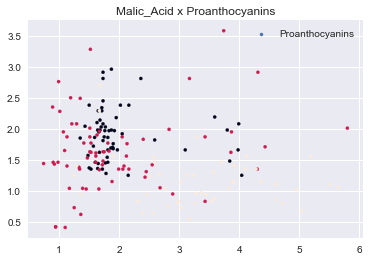

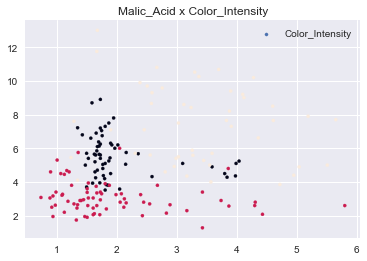

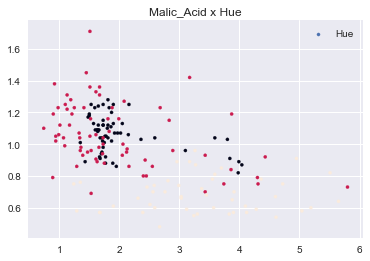

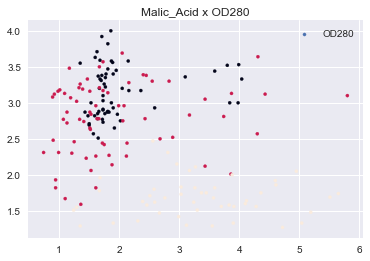

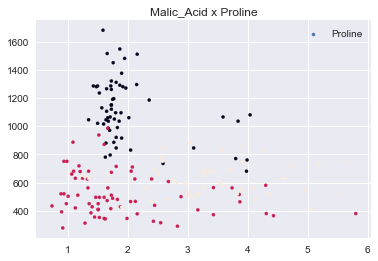

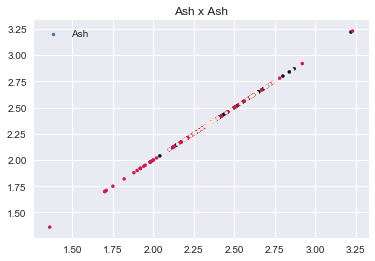

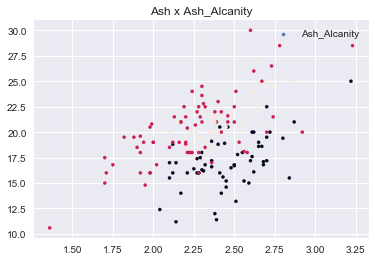

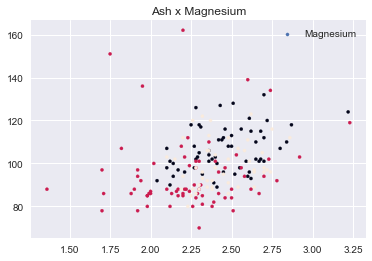

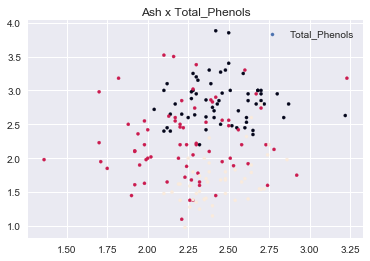

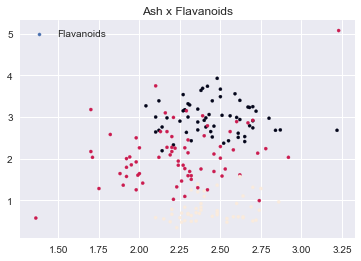

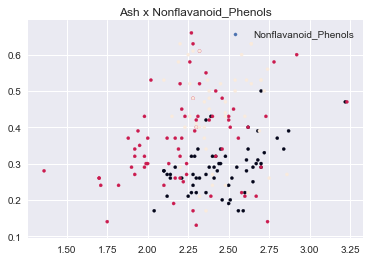

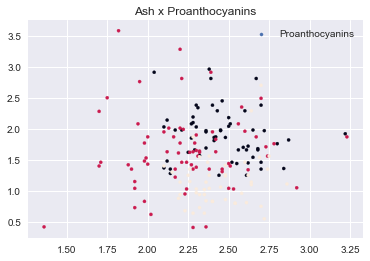

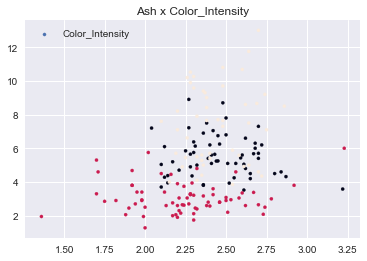

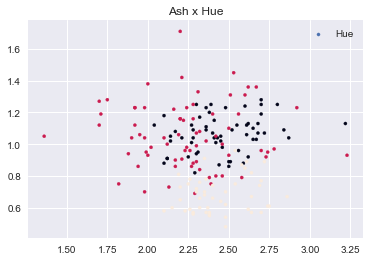

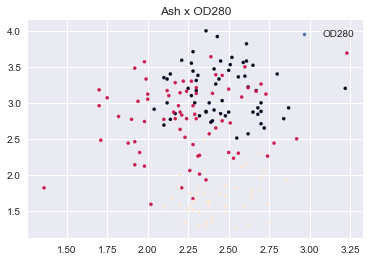

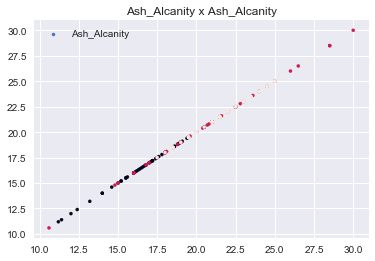

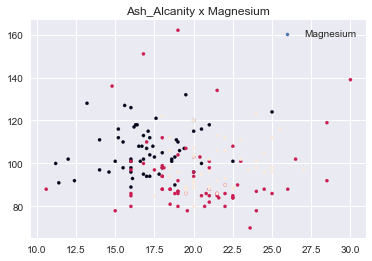

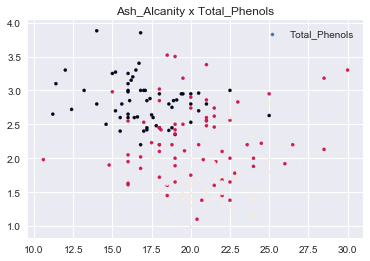

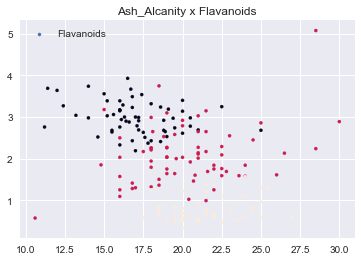

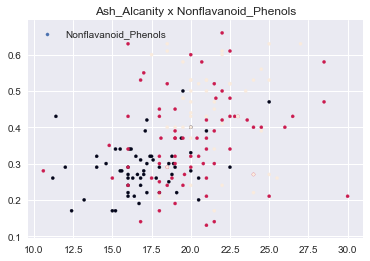

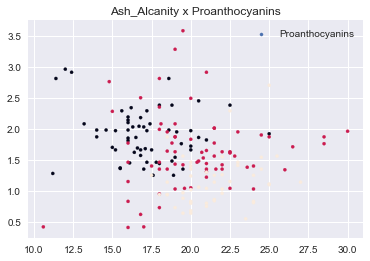

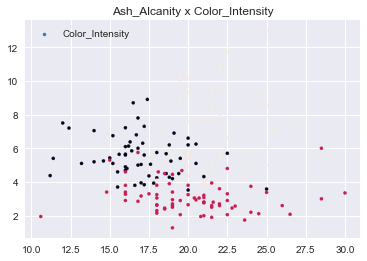

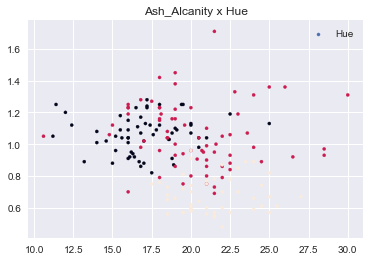

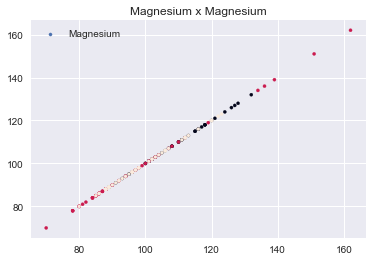

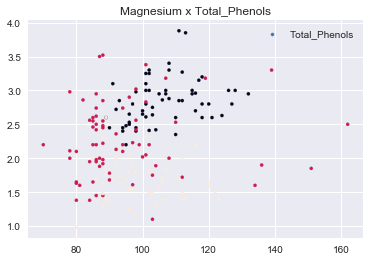

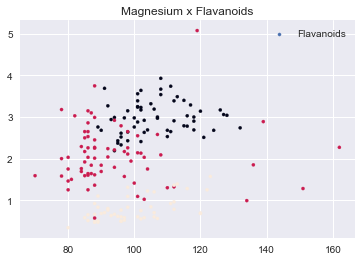

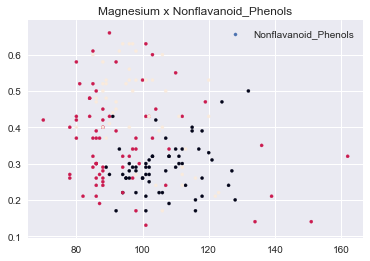

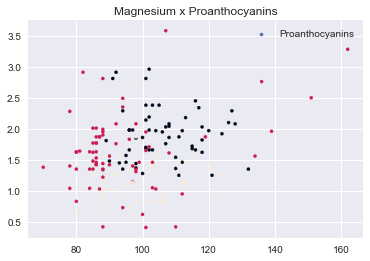

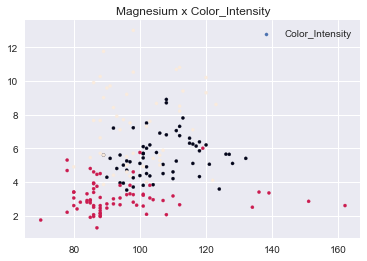

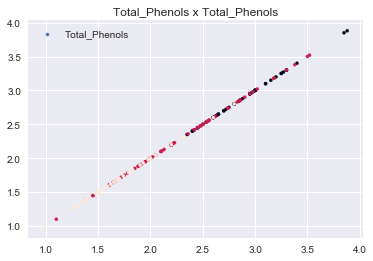

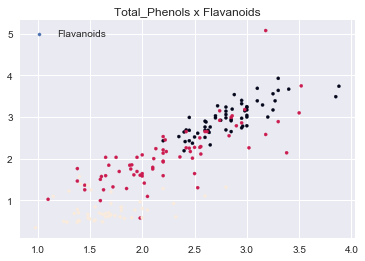

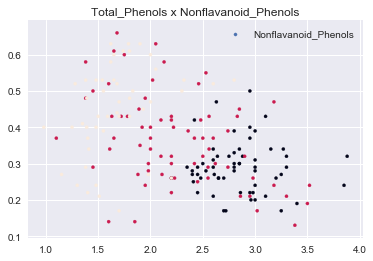

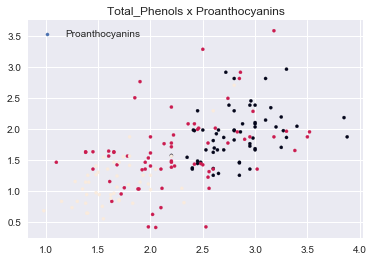

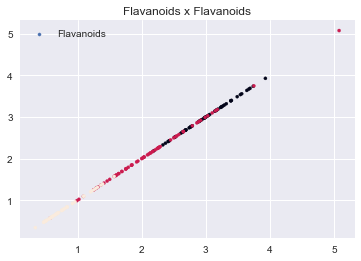

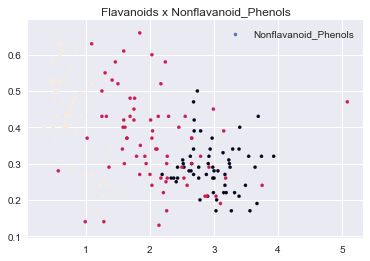

In [117]:
def scatterplot(x_data, y_data, x_label="", y_label="", title="", yscale_log=False, target=None):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, c=target)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()
   


for i in range(0,len(data_wine.columns)-1):
    for j in range(i,len(data_wine.columns)-i):
        scatterplot(x_data=data_wine.iloc[:,i],y_data=data_wine.iloc[:,j],title=data_wine.columns[i]+" x "+data_wine.columns[j],target=data_y)
    

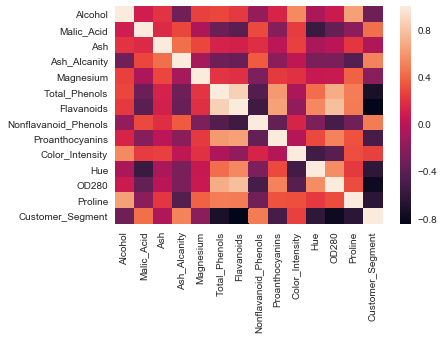

In [46]:
corr = data_wine.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

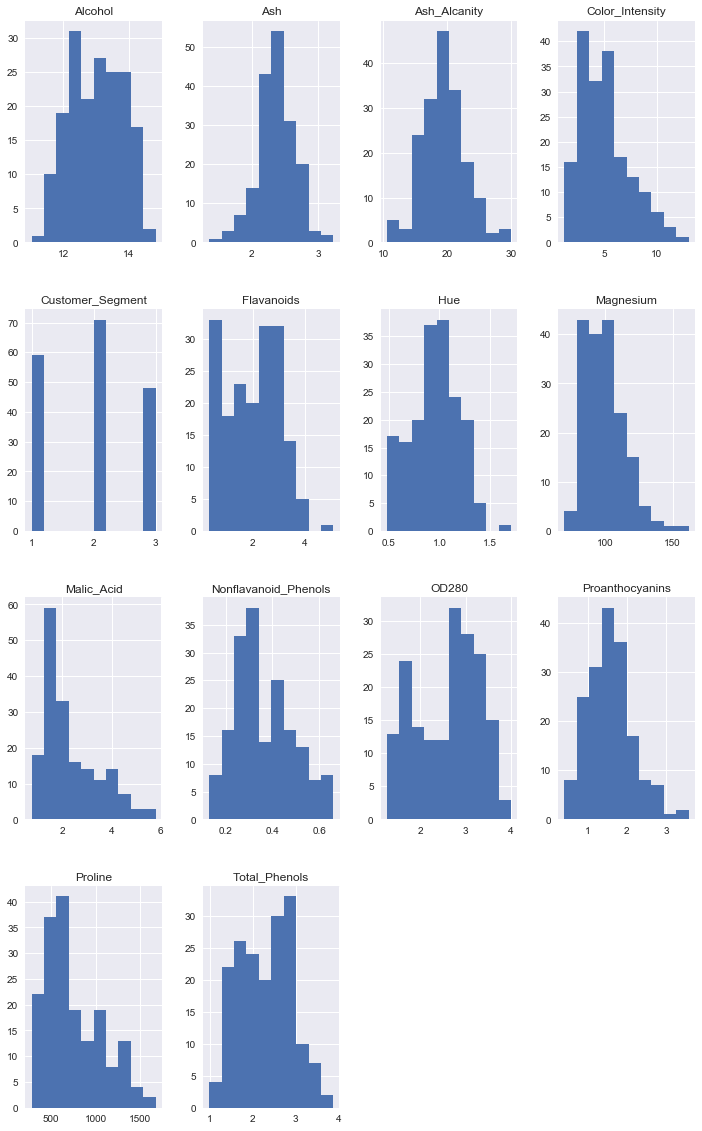

In [66]:
data_wine.hist(figsize=(12,20))
plt.show()

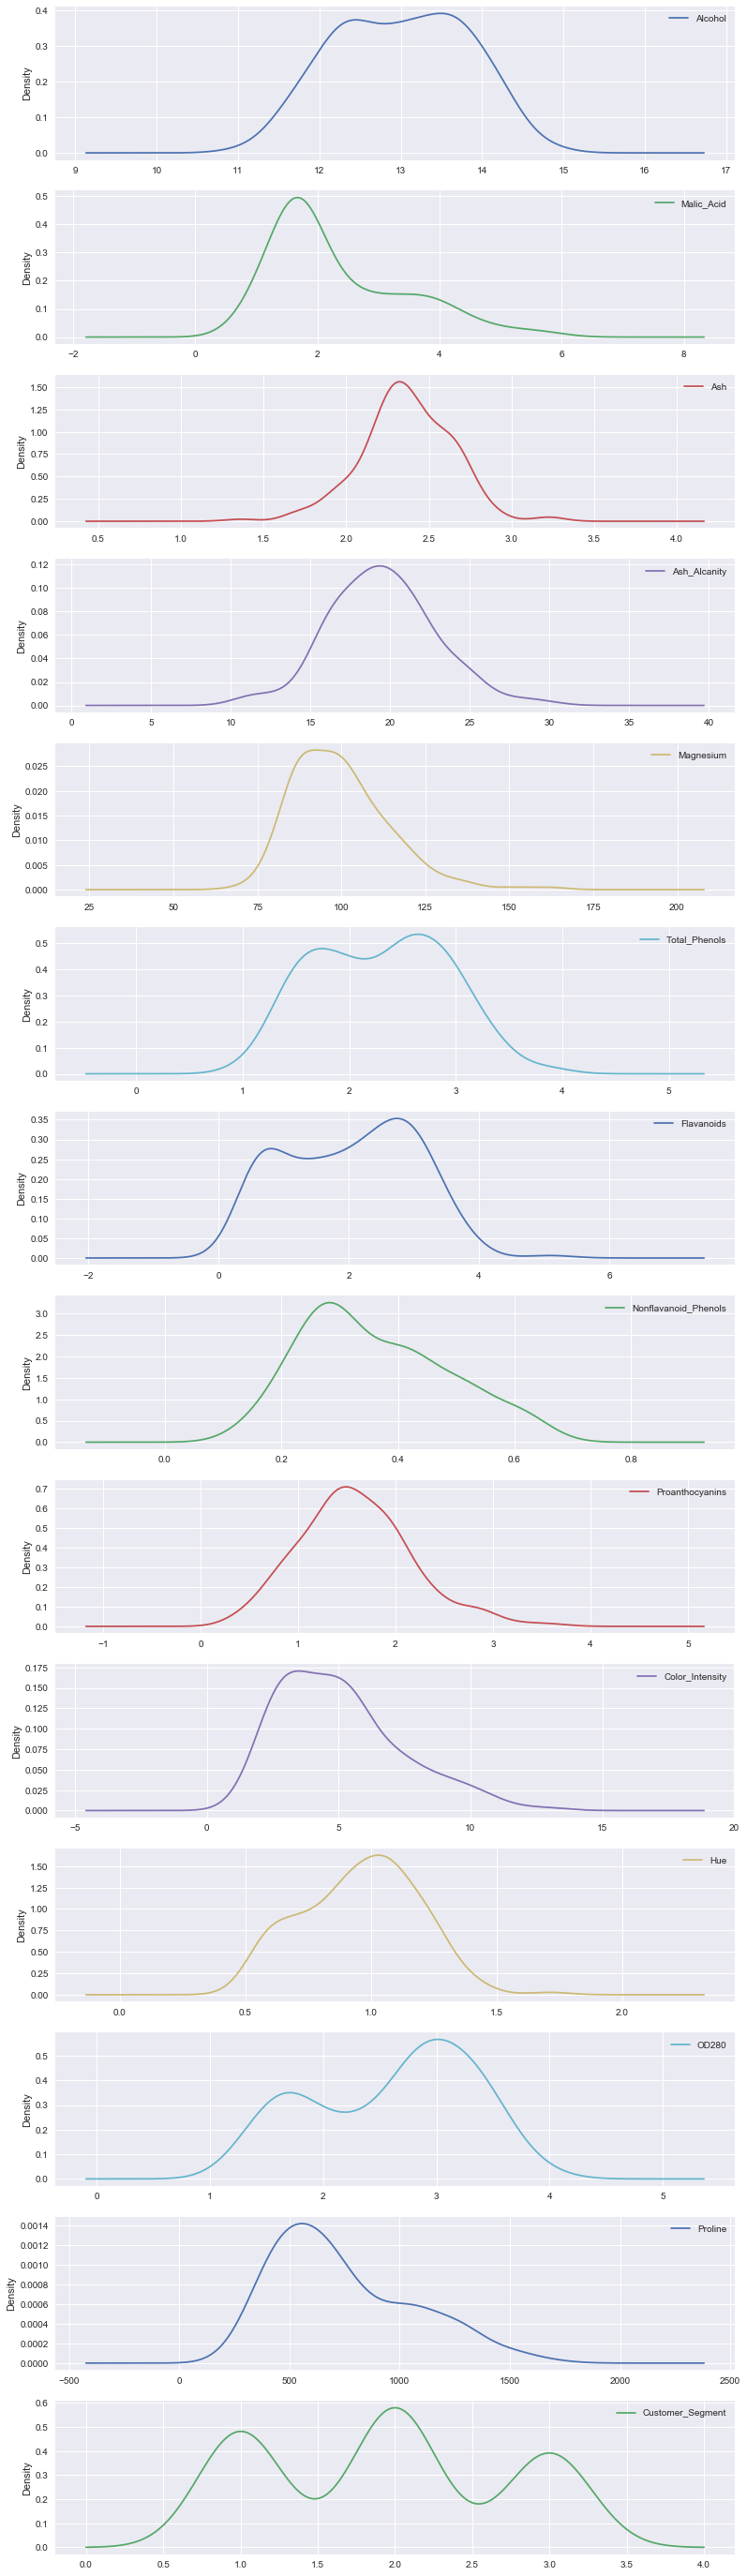

In [64]:
data_wine.plot(kind='density', subplots=True, layout=(14,1), sharex=False, figsize=(13,50))
plt.show()